In [2]:
import io
import os

import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image
import requests
from art.estimators.classification import BlackBoxClassifier, BlackBoxClassifierNeuralNetwork, PyTorchClassifier
from art.attacks.evasion import HopSkipJump, SquareAttack, SimBA, FastGradientMethod
from art.utils import to_categorical
from azureml.core import Workspace

from aidefender.utils.data import load_cats_and_dogs
from aidefender.utils.aml import mount_model
from aidefender.utils.pytorch import load_model, create_art_classifier

# Load data

In [3]:
images_dir = '/datadrive/aidefender/images/'

In [4]:
image_cat = Image.open(os.path.join(images_dir, 'cat.png'))
image_dog = Image.open(os.path.join(images_dir, 'dog.png'))

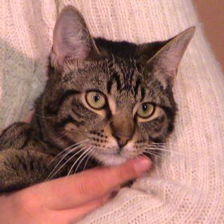

In [5]:
image_cat

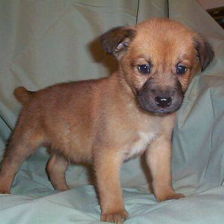

In [6]:
image_dog

# Predict using the deployed model

In [7]:
service_url = 'http://196bdccd-15c2-4e99-93a2-c8cb3387a73c.eastus.azurecontainer.io/score'

In [8]:
def get_image_bytes(image):
    file_stream = io.BytesIO()
    
    img = Image.fromarray(image.astype(np.uint8))
    img.save(file_stream, format='png')
    image_bytes = file_stream.getvalue()
    
    return image_bytes

In [9]:
def predict(service_url, image):
    image_bytes = get_image_bytes(image)
    
    files = {'image': image_bytes}
    r = requests.post(service_url, files=files)    
    
    response = r.json()
    
    return response

In [10]:
predict(service_url, np.array(image_cat))

{'label': 0}

In [11]:
predict(service_url, np.array(image_dog))

{'label': 1}

# Adversarial example

In [12]:
image_cat_adv = Image.open(os.path.join(images_dir, 'cat_adv.png'))

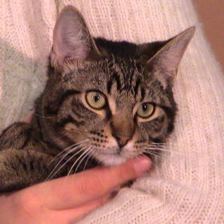

In [13]:
image_cat_adv

In [14]:
predict(service_url, np.array(image_cat_adv))

{'label': 1}

## Call the defended model

In [15]:
service_defended_url = 'http://f016b8e5-61ba-42d8-848b-d83798ac602f.eastus.azurecontainer.io/score'

In [16]:
predict(service_defended_url, np.array(image_cat))

{'label': 0}

In [17]:
predict(service_defended_url, np.array(image_cat_adv))

{'label': 0}